## Q1. What is a Support Vector Machine (SVM)?

**Answer:**

SVM is a supervised ML algorithm used for classification and regression. It finds the optimal hyperplane that best separates datapoints of different classes by maximizing the margin.


## Q2. What is the difference between Hard Margin and Soft Margin SVM?

**Answer:**

Hard Margin assumes perfectly separable data and allows no misclassification—sensitive to noise. Soft Margin introduces slack variables to allow misclassification and generalizes better on noisy data, controlled by parameter C.


## Q3. What is the mathematical intuition behind SVM?

**Answer:**

SVM maximizes the margin between classes. The optimization objective is to minimize (1/2) ||w||^2 subject to yi(w·xi + b) ≥ 1 for all training points.


## Q4. What is the role of Lagrange Multipliers in SVM?

**Answer:**

Lagrange multipliers convert the constrained primal optimization into the dual optimization problem; this allows using kernels and reduces the problem to quadratic programming solved over Lagrange multipliers (α).


## Q5. What are Support Vectors in SVM?

**Answer:**

Support vectors are the training points with non-zero Lagrange multipliers α — the points closest to the decision boundary. They uniquely define the optimal hyperplane.


## Q6. What is a Support Vector Classifier (SVC)?

**Answer:**

SVC is the SVM implementation for classification tasks — it finds the separating hyperplane (or decision boundary) using support vectors.


## Q7. What is a Support Vector Regressor (SVR)?

**Answer:**

SVR applies SVM ideas to regression. It fits a function within an epsilon-insensitive tube and penalizes deviations outside the tube.


## Q8. What is the Kernel Trick in SVM?

**Answer:**

The kernel trick computes dot-products in high-dimensional feature spaces implicitly via kernel functions (e.g., linear, polynomial, RBF), enabling non-linear decision boundaries without explicit coordinate transforms.


## Q9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

**Answer:**

Linear: best for linearly separable or high-dimensional sparse data. Polynomial: introduces polynomial features for moderate non-linearities. RBF (Gaussian): maps to infinite dimensional space and handles complex local decision boundaries.


## Q10. What is the effect of the C parameter in SVM?

**Answer:**

C controls penalty for misclassification. Large C → smaller margin, fewer training errors (risk overfitting). Small C → wider margin, more tolerance to misclassification (better generalization).


## Q11. What is the role of the Gamma parameter in RBF Kernel SVM?

**Answer:**

Gamma defines influence of a single training sample. High gamma → each example has high influence producing complex boundaries (overfit). Low gamma → influence is longer range producing smoother decision surfaces.


## Q12. What is the Naïve Bayes classifier, and why is it called 'Naïve'?

**Answer:**

Naïve Bayes is a probabilistic classifier based on Bayes' theorem. It is called 'naïve' because it assumes conditional independence among features.


## Q13. What is Bayes’ Theorem?

**Answer:**

P(A|B) = (P(B|A) * P(A)) / P(B) — it relates posterior probability P(A|B) to likelihood P(B|A), prior P(A), and evidence P(B).


## Q14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

**Answer:**

Gaussian NB: assumes continuous features follow Gaussian distribution. Multinomial NB: for count data (word counts). Bernoulli NB: for binary/boolean features (word presence/absence).


## Q15. When should you use Gaussian Naïve Bayes over other variants?

**Answer:**

Use Gaussian NB when features are continuous and approximately normally distributed.


## Q16. What are the key assumptions made by Naïve Bayes?

**Answer:**

Primary assumption: features are conditionally independent given the class. Also assumes the model form (e.g., Gaussian) matches feature distribution for parameter estimation.


## Q17. What are the advantages and disadvantages of Naïve Bayes?

**Answer:**

Advantages: fast, simple, requires small training data, works well for text. Disadvantages: independence assumption often unrealistic; correlated features degrade performance.


## Q18. Why is Naïve Bayes a good choice for text classification?

**Answer:**

Text features (word counts) are high-dimensional and sparse; Naive Bayes handles this efficiently and often performs well despite the independence assumption.


## Q19. Compare SVM and Naïve Bayes for classification tasks

**Answer:**

SVM: powerful for complex decision boundaries, robust to high-dimensional features, but slower to train. NB: simple, very fast, excellent baseline for text classification and large datasets.


## Q20. How does Laplace Smoothing help in Naïve Bayes?

**Answer:**

Laplace smoothing (adding α, typically 1) prevents zero probabilities for unseen features by adding a small constant to counts; e.g., P(word) = (count + α) / (total + α * V).


In [1]:
# Common imports used across practical cells
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, precision_recall_fscore_support, confusion_matrix, roc_auc_score, log_loss, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, RFE
import warnings
warnings.filterwarnings('ignore')
print('Imports done')


Imports done


## Q21. Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy


In [2]:
# Q21: SVM on Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Use only two classes for simplicity (binary) or use multi-class SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy (Iris, linear SVC):', accuracy_score(y_test, y_pred))


Accuracy (Iris, linear SVC): 1.0


## Q22. Train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies


In [3]:
# Q22: Wine dataset - Linear vs RBF
wine = datasets.load_wine()
X = wine.data; y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf_lin = SVC(kernel='linear', random_state=42).fit(X_train,y_train)
clf_rbf = SVC(kernel='rbf', random_state=42).fit(X_train,y_train)
print('Accuracy (Linear):', accuracy_score(y_test, clf_lin.predict(X_test)))
print('Accuracy (RBF):', accuracy_score(y_test, clf_rbf.predict(X_test)))


Accuracy (Linear): 0.9444444444444444
Accuracy (RBF): 0.6666666666666666


## Q23. Train an SVR on a housing dataset and evaluate using MSE


In [4]:
# Q23: SVR on California housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data; y = data.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
svr = SVR(kernel='rbf').fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)
print('MSE (SVR):', mean_squared_error(y_test, y_pred))


MSE (SVR): 0.3570026426754465


## Q24. Train an SVM with Polynomial Kernel and visualize the decision boundary (2D synthetic data)


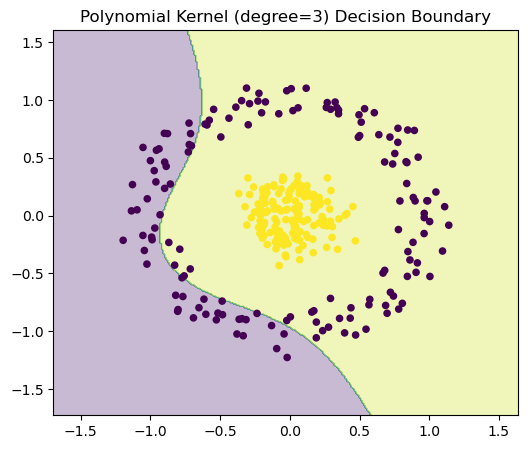

In [5]:
# Q24: Polynomial kernel visualization using a 2D dataset
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=300, noise=0.1, factor=0.2, random_state=42)
clf_poly = SVC(kernel='poly', degree=3, C=1.0).fit(X,y)

# create grid
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300))
Z = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=20)
plt.title('Polynomial Kernel (degree=3) Decision Boundary')
plt.show()


## Q25. Train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy


In [6]:
# Q25: Gaussian NB on Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy (Gaussian NB, Breast Cancer):', accuracy_score(y_test, y_pred))


Accuracy (Gaussian NB, Breast Cancer): 0.9385964912280702


## Q26. Train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset


In [ ]:
# Q26: Multinomial NB on 20 Newsgroups (subset for speed)
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism','sci.space','comp.graphics','rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats, remove=('headers','footers','quotes'))

vect = TfidfVectorizer(max_features=5000)
X_train_t = vect.fit_transform(newsgroups_train.data)
X_test_t = vect.transform(newsgroups_test.data)
mnb = MultinomialNB(alpha=1.0).fit(X_train_t, newsgroups_train.target)
y_pred = mnb.predict(X_test_t)
print('Accuracy (Multinomial NB, 20 Newsgroups subset):', accuracy_score(newsgroups_test.target, y_pred))


## Q27. Train SVM with different C values and compare decision boundaries (2D synthetic dataset)


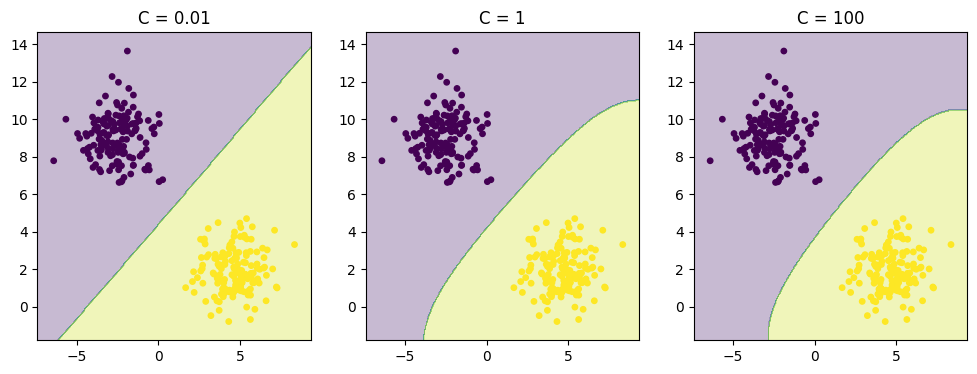

In [ ]:
# Q27: Compare decision boundaries for different C values
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.2)
Cs = [0.01, 1, 100]
plt.figure(figsize=(12,4))
for i,C in enumerate(Cs,1):
    clf = SVC(kernel='rbf', C=C, gamma='scale').fit(X,y)
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1,3,i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=15)
    plt.title(f'C = {C}')
plt.show()


## Q28. Train a Bernoulli Naïve Bayes classifier for binary classification on binary-feature dataset


In [ ]:
# Q28: Bernoulli NB on synthetic binary features
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=20, n_informative=5, random_state=42)
# Binarize features using median threshold to simulate binary features
X_bin = (X > np.median(X, axis=0)).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42, stratify=y)
bnb = BernoulliNB(alpha=1.0).fit(X_train, y_train)
print('Accuracy (Bernoulli NB):', accuracy_score(y_test, bnb.predict(X_test)))


Accuracy (Bernoulli NB): 0.69


## Q29. Apply feature scaling before SVM and compare results with unscaled data


In [ ]:
# Q29: Scaling effect on SVM (Wine dataset)
wine = datasets.load_wine()
X = wine.data; y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf_noscale = SVC(kernel='rbf').fit(X_train, y_train)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train); X_test_s = scaler.transform(X_test)
clf_scaled = SVC(kernel='rbf').fit(X_train_s, y_train)
print('Accuracy (no scaling):', accuracy_score(y_test, clf_noscale.predict(X_test)))
print('Accuracy (with scaling):', accuracy_score(y_test, clf_scaled.predict(X_test_s)))


Accuracy (no scaling): 0.6666666666666666
Accuracy (with scaling): 0.9814814814814815


## Q30. Compare Gaussian Naïve Bayes predictions before and after Laplace smoothing (for Multinomial we can show alpha effect)


In [ ]:
# Q30: Laplace smoothing demonstration using Multinomial NB on a small text subset
from sklearn.datasets import fetch_20newsgroups
cats = ['sci.space','rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers','footers','quotes'))
test = fetch_20newsgroups(subset='test', categories=cats, remove=('headers','footers','quotes'))
vect = CountVectorizer(max_features=2000)
X_train = vect.fit_transform(train.data)
X_test = vect.transform(test.data)

mnb_no = MultinomialNB(alpha=0.0).fit(X_train, train.target)  # no smoothing (may warn)
mnb_lap = MultinomialNB(alpha=1.0).fit(X_train, train.target)
print('Accuracy (alpha=0.0):', accuracy_score(test.target, mnb_no.predict(X_test)))
print('Accuracy (alpha=1.0):', accuracy_score(test.target, mnb_lap.predict(X_test)))


Accuracy (alpha=0.0): 0.9243379571248423
Accuracy (alpha=1.0): 0.9419924337957125


## Q31. Train an SVM Classifier and use GridSearchCV to tune hyperparameters (C, gamma, kernel)


In [ ]:
# Q31: GridSearchCV on Wine dataset (small grid for speed)
wine = datasets.load_wine()
X = wine.data; y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
param_grid = {'C':[0.1,1,10], 'gamma':['scale','auto'], 'kernel':['rbf','poly']}
grid = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)
print('Test accuracy with best estimator:', accuracy_score(y_test, grid.best_estimator_.predict(X_test)))


Best params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Test accuracy with best estimator: 0.9629629629629629


## Q32. Train an SVM on an imbalanced dataset and apply class weighting


In [ ]:
# Q32: Imbalanced dataset handling via class_weight
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.9,0.1], n_classes=2, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf_default = SVC(kernel='rbf').fit(X_train, y_train)
clf_bal = SVC(kernel='rbf', class_weight='balanced').fit(X_train, y_train)
print('Accuracy (default):', accuracy_score(y_test, clf_default.predict(X_test)))
print('Accuracy (class_weight=balanced):', accuracy_score(y_test, clf_bal.predict(X_test)))


Accuracy (default): 0.97
Accuracy (class_weight=balanced): 0.9433333333333334


## Q33. Implement a Naïve Bayes classifier for spam detection using email-like data (20 Newsgroups proxy)


In [ ]:
# Q33: Simple spam-proxy using 2 categories as ham/spam (subset)
cats = ['sci.space','talk.politics.misc']  # proxy labels
train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers','footers','quotes'))
test = fetch_20newsgroups(subset='test', categories=cats, remove=('headers','footers','quotes'))
vect = TfidfVectorizer(max_features=5000)
X_train = vect.fit_transform(train.data)
X_test = vect.transform(test.data)
mnb = MultinomialNB(alpha=1.0).fit(X_train, train.target)
print('Accuracy (spam-proxy):', accuracy_score(test.target, mnb.predict(X_test)))


Accuracy (spam-proxy): 0.8863636363636364


## Q34. Train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare accuracy


In [ ]:
# Q34: Compare SVM and GaussianNB on Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train); X_test_s = scaler.transform(X_test)
svm_clf = SVC(kernel='rbf').fit(X_train_s, y_train)
gnb = GaussianNB().fit(X_train_s, y_train)
print('Accuracy (SVM):', accuracy_score(y_test, svm_clf.predict(X_test_s)))
print('Accuracy (GaussianNB):', accuracy_score(y_test, gnb.predict(X_test_s)))


Accuracy (SVM): 0.9824561403508771
Accuracy (GaussianNB): 0.9298245614035088


## Q35. Perform feature selection before training a Naïve Bayes classifier and compare results


In [ ]:
# Q35: Feature selection (SelectKBest) then MultinomialNB on text (20newsgroups subset)
train = fetch_20newsgroups(subset='train', categories=['sci.space','rec.sport.hockey'], remove=('headers','footers','quotes'))
test = fetch_20newsgroups(subset='test', categories=['sci.space','rec.sport.hockey'], remove=('headers','footers','quotes'))
vect = TfidfVectorizer(max_features=5000)
X_train = vect.fit_transform(train.data); X_test = vect.transform(test.data)
# Use chi2 for selecting top features (requires non-negative)
selector = SelectKBest(chi2, k=1000).fit(X_train, train.target)
X_train_sel = selector.transform(X_train); X_test_sel = selector.transform(X_test)
mnb_full = MultinomialNB(alpha=1.0).fit(X_train, train.target)
mnb_sel = MultinomialNB(alpha=1.0).fit(X_train_sel, train.target)
print('Accuracy (full features):', accuracy_score(test.target, mnb_full.predict(X_test)))
print('Accuracy (selected features):', accuracy_score(test.target, mnb_sel.predict(X_test_sel)))


Accuracy (full features): 0.9445145018915511
Accuracy (selected features): 0.9520807061790668


## Q36. Train SVM using One-vs-Rest (OvR) and One-vs-One (OvO) on the Wine dataset and compare accuracy


In [ ]:
# Q36: OvR vs OvO using SVC parameters 'decision_function_shape' for OvR/OvO
wine = datasets.load_wine()
X = wine.data; y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf_ovo = SVC(decision_function_shape='ovo').fit(X_train, y_train)
clf_ovr = SVC(decision_function_shape='ovr').fit(X_train, y_train)
print('Accuracy (OvO):', accuracy_score(y_test, clf_ovo.predict(X_test)))
print('Accuracy (OvR):', accuracy_score(y_test, clf_ovr.predict(X_test)))


Accuracy (OvO): 0.6666666666666666
Accuracy (OvR): 0.6666666666666666


## Q37. Train SVM with Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare accuracy


In [ ]:
# Q37: Kernel comparison on Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train); X_test_s = scaler.transform(X_test)
for k in ['linear','poly','rbf']:
    clf = SVC(kernel=k).fit(X_train_s, y_train)
    print(f'Accuracy ({k}):', accuracy_score(y_test, clf.predict(X_test_s)))


Accuracy (linear): 0.9736842105263158
Accuracy (poly): 0.9122807017543859
Accuracy (rbf): 0.9824561403508771


## Q38. Train SVM using Stratified K-Fold Cross-Validation and compute average accuracy


In [ ]:
# Q38: Stratified K-Fold on Wine dataset with SVM
wine = datasets.load_wine()
X = wine.data; y = wine.target
clf = SVC(kernel='rbf', C=1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=skf)
print('Stratified K-Fold accuracies:', scores)
print('Average accuracy:', np.mean(scores))


Stratified K-Fold accuracies: [0.63888889 0.69444444 0.63888889 0.65714286 0.74285714]
Average accuracy: 0.6744444444444444


## Q39. Train a Naïve Bayes classifier using different prior probabilities and compare performance


In [ ]:
# Q39: GaussianNB with different priors (Breast Cancer)
cancer = datasets.load_breast_cancer()
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
gnb_default = GaussianNB().fit(X_train, y_train)
gnb_prior = GaussianNB(priors=[0.7,0.3]).fit(X_train, y_train)  # example priors
print('Accuracy (default priors):', accuracy_score(y_test, gnb_default.predict(X_test)))
print('Accuracy (custom priors 0.7/0.3):', accuracy_score(y_test, gnb_prior.predict(X_test)))


Accuracy (default priors): 0.9385964912280702
Accuracy (custom priors 0.7/0.3): 0.9298245614035088


## Q40. Perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy


In [ ]:
# Q40: RFE + SVM on Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train); X_test_s = scaler.transform(X_test)
svc = SVC(kernel='linear', C=1)
rfe = RFE(estimator=svc, n_features_to_select=10).fit(X_train_s, y_train)
X_train_r = rfe.transform(X_train_s); X_test_r = rfe.transform(X_test_s)
svc.fit(X_train_s, y_train)
svc_r = SVC(kernel='linear', C=1).fit(X_train_r, y_train)
print('Accuracy (all features):', accuracy_score(y_test, svc.predict(X_test_s)))
print('Accuracy (RFE selected features):', accuracy_score(y_test, svc_r.predict(X_test_r)))


Accuracy (all features): 0.9736842105263158
Accuracy (RFE selected features): 0.9473684210526315


## Q41. Train an SVM Classifier and evaluate using Precision, Recall, and F1-Score


In [ ]:
# Q41: Precision, Recall, F1 for SVM on Wine (binary by taking 2 classes)
wine = datasets.load_wine()
# make it binary for clarity: class 0 vs others
X = wine.data; y = (wine.target == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred = clf.predict(X_test)
prec, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision:', prec, 'Recall:', recall, 'F1:', f1)


Precision: 0.9285714285714286 Recall: 0.7222222222222222 F1: 0.8125


## Q42. Train a Naïve Bayes Classifier and evaluate using Log Loss (Cross-Entropy)


In [ ]:
# Q42: Log Loss for MultinomialNB on 20newsgroups subset
train = fetch_20newsgroups(subset='train', categories=['sci.space','rec.sport.hockey'], remove=('headers','footers','quotes'))
test = fetch_20newsgroups(subset='test', categories=['sci.space','rec.sport.hockey'], remove=('headers','footers','quotes'))
vect = TfidfVectorizer(max_features=2000)
X_train = vect.fit_transform(train.data); X_test = vect.transform(test.data)
mnb = MultinomialNB(alpha=1.0).fit(X_train, train.target)
probs = mnb.predict_proba(X_test)
print('Log Loss:', log_loss(test.target, probs))


Log Loss: 0.20242417670403862


## Q43. Train SVM and visualize the Confusion Matrix using matplotlib


Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


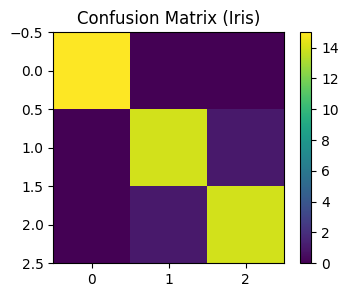

In [ ]:
# Q43: Confusion matrix for SVM on Iris (multi-class)
iris = datasets.load_iris()
X = iris.data; y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf = SVC(kernel='rbf').fit(X_train, y_train)
cm = confusion_matrix(y_test, clf.predict(X_test))
print('Confusion Matrix:\n', cm)
plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix (Iris)')
plt.colorbar()
plt.show()


## Q44. Train an SVR and evaluate using Mean Absolute Error (MAE)


In [ ]:
# Q44: SVR MAE on California housing (reuse earlier)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train); X_test_s = scaler.transform(X_test)
svr = SVR(kernel='rbf').fit(X_train_s, y_train)
y_pred = svr.predict(X_test_s)
print('MAE (SVR):', mean_absolute_error(y_test, y_pred))


MAE (SVR): 0.39859828301457567


## Q45. Train a Naïve Bayes classifier and evaluate using ROC-AUC score


In [ ]:
# Q45: ROC-AUC for GaussianNB on Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data; y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
gnb = GaussianNB().fit(X_train, y_train)
probs = gnb.predict_proba(X_test)[:,1]
print('ROC-AUC:', roc_auc_score(y_test, probs))


ROC-AUC: 0.9877645502645502


## Q46. Train an SVM Classifier and visualize the Precision-Recall Curve


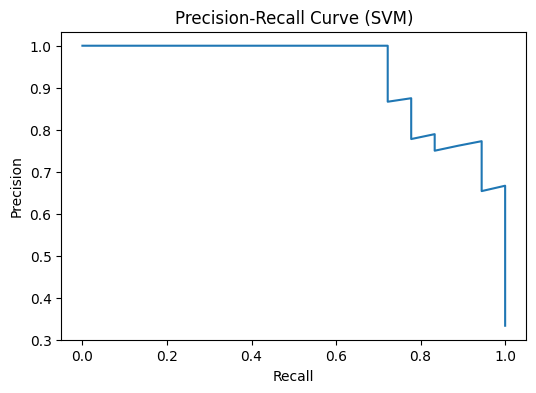

In [ ]:
# Q46: Precision-Recall curve for SVM (use probabilistic calibration via decision function)
from sklearn.preprocessing import label_binarize
wine = datasets.load_wine()
# binary problem: class 0 vs rest
X = wine.data; y = (wine.target == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
clf = SVC(kernel='rbf', probability=True).fit(X_train, y_train)
probs = clf.predict_proba(X_test)[:,1]
prec, rec, _ = precision_recall_curve(y_test, probs)
plt.figure(figsize=(6,4))
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.show()
